In [20]:
import geopandas as gpd
import pandas as pd
import json
pd.set_option('display.max_columns', None)

Importing Data

In [22]:
precinct_boundaries = gpd.read_file('data/Arizona/boundary_data/az_2020.shp')
us_hor_results = pd.read_csv('data/2020-HOUSE-precinct-general.csv')
racial_demographics = pd.read_csv('data/Arizona/demographic_data/DECENNIALPL2020.P2-Data.csv')
demoBound = gpd.read_file('data/Arizona/demographic_data/demographic_boundary/tl_2020_04_tract20.shp') #tracts
test = pd.read_csv('data/Arizona/demographic_data/vtd/DECENNIALPL2020.P2-Data.csv')
display(test)
display(precinct_boundaries)
#display(demoBound)
#display(demoBound.plot())

,GEO_ID,NAME,P2_001N,P2_001NA,P2_002N,P2_002NA,P2_003N,P2_003NA,P2_004N,P2_004NA,P2_005N,P2_005NA,P2_006N,P2_006NA,P2_007N,P2_007NA,P2_008N,P2_008NA,P2_009N,P2_009NA,P2_010N,P2_010NA,P2_011N,P2_011NA,P2_012N,P2_012NA,P2_013N,P2_013NA,P2_014N,P2_014NA,P2_015N,P2_015NA,P2_016N,P2_016NA,P2_017N,P2_017NA,P2_018N,P2_018NA,P2_019N,P2_019NA,P2_020N,P2_020NA,P2_021N,P2_021NA,P2_022N,P2_022NA,P2_023N,P2_023NA,P2_024N,P2_024NA,P2_025N,P2_025NA,P2_026N,P2_026NA,P2_027N,P2_027NA,P2_028N,P2_028NA,P2_029N,P2_029NA,P2_030N,P2_030NA,P2_031N,P2_031NA,P2_032N,P2_032NA,P2_033N,P2_033NA,P2_034N,P2_034NA,P2_035N,P2_035NA,P2_036N,P2_036NA,P2_037N,P2_037NA,P2_038N,P2_038NA,P2_039N,P2_039NA,P2_040N,P2_040NA,P2_041N,P2_041NA,P2_042N,P2_042NA,P2_043N,P2_043NA,P2_044N,P2_044NA,P2_045N,P2_045NA,P2_046N,P2_046NA,P2_047N,P2_047NA,P2_048N,P2_048NA,P2_049N,P2_049NA,P2_050N,P2_050NA,P2_051N,P2_051NA,P2_052N,P2_052NA,P2_053N,P2_053NA,P2_054N,P2_054NA,P2_055N,P2_055NA,P2_056N,P2_056NA,P2_057N,P2_057NA,P2_058N,P2_058NA,P2_059N,P2_059NA,P2_060N,P2_060NA,P2_061N,P2_061NA,P2_062N,P2_062NA,P2_063N,P2_063NA,P2_064N,P2_064NA,P2_065N,P2_065NA,P2_066N,P2_066NA,P2_067N,P2_067NA,P2_068N,P2_068NA,P2_069N,P2_069NA,P2_070N,P2_070NA,P2_071N,P2_071NA,P2_072N,P2_072NA,P2_073N,P2_073NA,Unnamed: 148
0,Geography,Geographic Area Name,!!Total:,Annotation of !!Total:,!!Total:!!Hispanic or Latino,Annotation of !!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:,Annotation of !!Total:!!Not Hispanic or Latino:,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !

,CDE_COUNTY,PCTNUM,PRECINCTNA,G20PREDBID,G20PRERTRU,G20PRELJOR,G20USSDKEL,G20USSRMCS,geometry
0,AP,AP0002,ALPINE,94,283,5,98,284,"POLYGON ((-109.49567 33.65280, -109.49576 33.6..."
1,AP,AP0003,CANYON DE CHELLY,1982,273,30,1995,290,"POLYGON ((-109.71666 36.26151, -109.71658 36.2..."
2,AP,AP0005,CHINLE,989,148,20,994,157,"POLYGON ((-109.81183 36.27512, -109.80810 36.2..."
3,AP,AP0009,CONCHO,333,1486,22,381,1422,"POLYGON ((-109.53982 34.44871, -109.53928 34.4..."
4,AP,AP0011,COTTONWOOD,748,87,5,763,85,"POLYGON ((-109.81768 36.14760, -109.81822 36.1..."
...,...,...,...,...,...,...,...,...,...
1484,GN,GN0003,CLIFTON 1,329,400,16,389,347,"POLYGON ((-109.27632 33.13312, -109.27637 33.1..."
1485,GN,GN0006,EAST PLANTSITE,46,152,6,57,143,"POLYGON ((-109.31894 33.05199, -109.31855 33.0..."
1486,YA,YA0232,GHOST,1271,1152,42,1325,1118,"POLYGON ((-112.04047 34.80011, -112.04045 34.8..."
1487,YA,YA0222,BUG,811,2316,41,919,2219,"POLYGON ((-111.49511 33.99991, -111.49533 33.9..."


Boundary Data Preprocessing

In [3]:
precinct_boundaries.drop(["CDE_COUNTY","G20PREDBID","G20PRERTRU","G20PRELJOR","G20USSDKEL","G20USSRMCS"], axis = 1, inplace=True)
precinct_boundaries['PRECINCTNA'] = precinct_boundaries['PRECINCTNA'].str.lower()


Voting Data preprocessing

In [4]:
us_hor_results.drop(["office",'party_detailed','mode','county_name','county_fips','jurisdiction_name','jurisdiction_fips','candidate','district','magnitude','dataverse','year','stage','state','special','writein','state_fips','state_cen','state_ic','date','readme_check'], axis = 1, inplace=True)
vote = us_hor_results[us_hor_results['state_po'] == 'AZ'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
vote['precinct'] = vote['precinct'].str.lower()

Demographic Data Preprocessing

In [5]:
racial_demographics.drop([0], axis = 0, inplace=True) #drop Header row
racial_demographics['totalPop'] = racial_demographics['P2_001N']
racial_demographics['africanAmericanPop'] = racial_demographics['P2_006N']
racial_demographics['caucasianPop'] = racial_demographics['P2_005N']
racial_demographics['latinoPop'] = racial_demographics['P2_002N']
racial_demographics['asainPop'] = racial_demographics['P2_008N']
racial_demographics['nativeAmericanPop'] = racial_demographics['P2_007N']
#racial_demographics['otherPop'] = racial_demographics['totalPop'] - (racial_demographics['africanAmericanPop'] + racial_demographics['caucasianPop'] + racial_demographics['latinoPop'] + racial_demographics['asainPop'] + racial_demographics['nativeAmericanPop'])
final_columns = ['GEO_ID', 'totalPop','africanAmericanPop','caucasianPop','latinoPop','asainPop', 'nativeAmericanPop']
racial_demographics = racial_demographics[racial_demographics.columns.intersection(final_columns)]
racial_demographics['GEO_ID'] = racial_demographics['GEO_ID'].str[14:]
display(racial_demographics)

,GEO_ID,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
1,942600,1549,1,8,10,0,1522
2,942700,4491,7,56,61,29,4288
3,944000,5348,18,133,98,56,4945
4,944100,5495,7,300,126,16,4946
5,944201,4021,22,190,76,63,3611
...,...,...,...,...,...,...,...
1761,012100,725,23,312,305,25,7
1762,980003,0,0,0,0,0,0
1763,980004,5,0,1,1,0,0
1764,980005,503,2,352,146,2,0


Demographic Boundary Functions

In [6]:
#MODIFY
def map_precinct_to_tract(tract_geometry):
    target_precinct = precinct_boundaries[precinct_boundaries['geometry'].intersects(tract_geometry)]
    #display(target_precinct)
    if(len(target_precinct.index) == 1):
        return target_precinct['PRECINCTNA'].iloc[0]
    else:
        return str(len(target_precinct.index))
    

Demographic Boundary Preprocessing

,TRACTCE20,geometry,GEO_ID,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct
0,950500,"POLYGON ((-114.67888 35.50137, -114.67883 35.5...",950500,1363,13,1088,200,8,6,7
1,954900,"POLYGON ((-114.10394 35.26982, -114.10256 35.2...",954900,4048,49,3205,473,73,38,3
2,951800,"POLYGON ((-114.64029 35.09852, -114.64012 35.0...",951800,3431,38,1927,1238,25,28,211 bullhead city
3,952400,"POLYGON ((-114.48778 34.71722, -114.48622 34.7...",952400,3176,12,2593,379,31,28,4
4,012100,"POLYGON ((-114.47325 33.02788, -114.45989 33.0...",012100,725,23,312,305,25,7,9
...,...,...,...,...,...,...,...,...,...,...
2160,003707,"POLYGON ((-110.96121 32.15597, -110.96106 32.1...",003707,3679,124,320,3052,29,106,2
2161,004067,"POLYGON ((-110.85792 32.23590, -110.85789 32.2...",004067,2898,173,1738,713,95,18,5
2162,003303,"POLYGON ((-110.87547 32.22881, -110.87546 32.2...",003303,4088,191,2435,1036,141,35,5
2163,003706,"POLYGON ((-110.96124 32.16335, -110.96108 32.1...",003706,5426,154,548,4548,22,86,3


,PCTNUM,PRECINCTNA,geometry
0,AP0002,alpine,"POLYGON ((-109.49567 33.65280, -109.49576 33.6..."
1,AP0003,canyon de chelly,"POLYGON ((-109.71666 36.26151, -109.71658 36.2..."
2,AP0005,chinle,"POLYGON ((-109.81183 36.27512, -109.80810 36.2..."
3,AP0009,concho,"POLYGON ((-109.53982 34.44871, -109.53928 34.4..."
4,AP0011,cottonwood,"POLYGON ((-109.81768 36.14760, -109.81822 36.1..."
...,...,...,...
1484,GN0003,clifton 1,"POLYGON ((-109.27632 33.13312, -109.27637 33.1..."
1485,GN0006,east plantsite,"POLYGON ((-109.31894 33.05199, -109.31855 33.0..."
1486,YA0232,ghost,"POLYGON ((-112.04047 34.80011, -112.04045 34.8..."
1487,YA0222,bug,"POLYGON ((-111.49511 33.99991, -111.49533 33.9..."


4                        447
5                        405
3                        309
6                        305
7                        188
2                        132
8                         95
9                         69
11                        49
10                        43
12                        26
14                        16
211 bullhead city          9
13                         8
220 lake havasu south      8
16                         6
22                         5
212 mohave valley          3
15                         3
woodglen                   2
sitgreaves                 2
18                         2
scarlet                    2
27                         2
florence north             2
parker 1                   2
mogollon                   2
19                         2
17                         2
20                         1
hudson                     1
yuma 24                    1
pima 217                   1
yuma 31                    1
yuma 20       

<AxesSubplot: >

<AxesSubplot: >

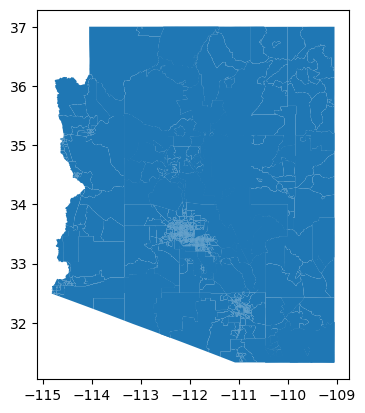

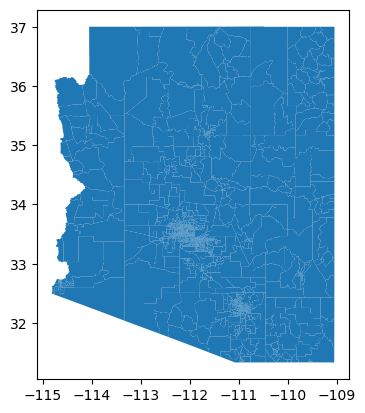

In [7]:
bound_merge_columns = ['TRACTCE20' , 'geometry']
demoBound = demoBound[demoBound.columns.intersection(bound_merge_columns)]
demoBound = demoBound.merge(racial_demographics, left_on = 'TRACTCE20', right_on = 'GEO_ID')
demoBound['precinct'] = 'n/a'
demoBound['precinct'] = demoBound['geometry'].apply(map_precinct_to_tract)

display(demoBound)
display(precinct_boundaries)
display(demoBound['precinct'].value_counts())
display(demoBound.plot())
display(precinct_boundaries.plot())

Combining Data Functions

In [8]:
def total_votes(precinct, party, source):
    #precintdf = source[(source['precinct'].str.contains(precinct)) & (source['party'] == party)]
    precinctdf = get_precinct(precinct, source)
    precinctdf = precinctdf[precinctdf['party_simplified'] == party]
    return precinctdf['votes'].sum()

def get_precinct(precinct, source):
    precinctdf = source[source['precinct'].str.contains(precinct)]
    return precinctdf

Combining Data

In [9]:
state = precinct_boundaries
display(state)
display(vote)

,PCTNUM,PRECINCTNA,geometry
0,AP0002,alpine,"POLYGON ((-109.49567 33.65280, -109.49576 33.6..."
1,AP0003,canyon de chelly,"POLYGON ((-109.71666 36.26151, -109.71658 36.2..."
2,AP0005,chinle,"POLYGON ((-109.81183 36.27512, -109.80810 36.2..."
3,AP0009,concho,"POLYGON ((-109.53982 34.44871, -109.53928 34.4..."
4,AP0011,cottonwood,"POLYGON ((-109.81768 36.14760, -109.81822 36.1..."
...,...,...,...
1484,GN0003,clifton 1,"POLYGON ((-109.27632 33.13312, -109.27637 33.1..."
1485,GN0006,east plantsite,"POLYGON ((-109.31894 33.05199, -109.31855 33.0..."
1486,YA0232,ghost,"POLYGON ((-112.04047 34.80011, -112.04045 34.8..."
1487,YA0222,bug,"POLYGON ((-111.49511 33.99991, -111.49533 33.9..."


,precinct,party_simplified,votes
12921,001 eagle,DEMOCRAT,0
12922,001 eagle,DEMOCRAT,0
12923,001 eagle,DEMOCRAT,0
12924,001 eagle,REPUBLICAN,14
12925,001 eagle,REPUBLICAN,1
...,...,...,...
21850,0747 yuma,DEMOCRAT,38
21851,0747 yuma,DEMOCRAT,1
21852,0747 yuma,REPUBLICAN,644
21853,0747 yuma,REPUBLICAN,81


In [10]:
state['demVotes'] = state['PRECINCTNA'].apply(lambda precinct: total_votes(precinct, 'DEMOCRAT', vote))
state['repVotes'] = state['PRECINCTNA'].apply(lambda precinct: total_votes(precinct, 'REPUBLICAN', vote))
state['totalVotes'] = state['demVotes'] + state['repVotes']
display(state)

,PCTNUM,PRECINCTNA,geometry,demVotes,repVotes,totalVotes
0,AP0002,alpine,"POLYGON ((-109.49567 33.65280, -109.49576 33.6...",105,271,376
1,AP0003,canyon de chelly,"POLYGON ((-109.71666 36.26151, -109.71658 36.2...",1964,300,2264
2,AP0005,chinle,"POLYGON ((-109.81183 36.27512, -109.80810 36.2...",964,171,1135
3,AP0009,concho,"POLYGON ((-109.53982 34.44871, -109.53928 34.4...",373,1407,1780
4,AP0011,cottonwood,"POLYGON ((-109.81768 36.14760, -109.81822 36.1...",2282,2558,4840
...,...,...,...,...,...,...
1484,GN0003,clifton 1,"POLYGON ((-109.27632 33.13312, -109.27637 33.1...",381,356,737
1485,GN0006,east plantsite,"POLYGON ((-109.31894 33.05199, -109.31855 33.0...",59,142,201
1486,YA0232,ghost,"POLYGON ((-112.04047 34.80011, -112.04045 34.8...",1241,1142,2383
1487,YA0222,bug,"POLYGON ((-111.49511 33.99991, -111.49533 33.9...",814,2276,3090


In [11]:
display(state[state['PRECINCTNA'].str.contains('pima')])
display(vote[vote['precinct'].str.contains('pima')])
display(state['totalVotes'].value_counts())
display(state[state['totalVotes'] == 0])

,PCTNUM,PRECINCTNA,geometry,demVotes,repVotes,totalVotes
91,GM0009,pima,"POLYGON ((-109.77387 32.88395, -109.77426 32.8...",1649,2809,4458
851,MC0504,pima,"POLYGON ((-111.89166 33.50210, -111.89166 33.5...",1649,2809,4458
1225,PM0002,pima 2,"POLYGON ((-112.93221 32.50500, -112.93215 32.4...",0,0,0
1226,PM0001,pima 1,"POLYGON ((-112.91575 32.50498, -112.89862 32.5...",0,0,0
1227,PM0136,pima 136,"POLYGON ((-112.26686 32.50672, -112.25006 32.5...",0,0,0
...,...,...,...,...,...,...
1469,PM0005,pima 5,"POLYGON ((-111.76717 32.37426, -111.76739 32.4...",0,0,0
1470,PM0229,pima 229,"POLYGON ((-110.77256 31.96325, -110.77254 31.9...",0,0,0
1471,PM0249,pima 249,"POLYGON ((-110.77256 31.96325, -110.76790 31.9...",0,0,0
1472,PM0006,pima 6,"POLYGON ((-111.23387 32.40249, -111.23390 32.4...",0,0,0


,precinct,party_simplified,votes
14385,pima #9,DEMOCRAT,266
14386,pima #9,DEMOCRAT,74
14387,pima #9,DEMOCRAT,7
14388,pima #9,REPUBLICAN,1024
14389,pima #9,REPUBLICAN,578
14390,pima #9,REPUBLICAN,35
19227,0504 pima,DEMOCRAT,1255
19228,0504 pima,DEMOCRAT,45
19229,0504 pima,DEMOCRAT,2
19230,0504 pima,REPUBLICAN,1050


0        361
9216       4
6244       3
1268       3
2749       3
        ... 
4668       1
5531       1
2602       1
2588       1
14563      1
Name: totalVotes, Length: 1013, dtype: int64

,PCTNUM,PRECINCTNA,geometry,demVotes,repVotes,totalVotes
28,AP0065,st michaels,"POLYGON ((-109.04621 35.71881, -109.04629 35.6...",0,0,0
53,CN0019,flagstaff #19,"POLYGON ((-111.64822 35.17260, -111.64752 35.1...",0,0,0
87,GI0310,p/s east,"POLYGON ((-111.35065 34.29434, -111.35071 34.2...",0,0,0
88,GI0315,p/s west,"POLYGON ((-111.67580 34.28941, -111.67582 34.2...",0,0,0
92,GM0010,fort thomas,"POLYGON ((-110.05607 32.96750, -110.05614 32.9...",0,0,0
...,...,...,...,...,...,...
1470,PM0229,pima 229,"POLYGON ((-110.77256 31.96325, -110.77254 31.9...",0,0,0
1471,PM0249,pima 249,"POLYGON ((-110.77256 31.96325, -110.76790 31.9...",0,0,0
1472,PM0006,pima 6,"POLYGON ((-111.23387 32.40249, -111.23390 32.4...",0,0,0
1473,PM0175,pima 175,"POLYGON ((-111.25152 32.50165, -111.25149 32.5...",0,0,0


Exporting State Data

In [12]:
state.to_file('data/Arizona/arizonaGeo.geojson', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Arizona/arizona.json', orient = 'index', compression = 'infer', index = True, indent = 4)

Computing Adjacency Graph Functions

In [13]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

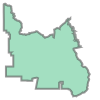

array([ 56,  59,  60,  62,  63,  68,  73,  74, 184, 211, 217], dtype=int64)

{(266, 268),
 (562, 1084),
 (1097, 1099),
 (242, 1488),
 (536, 537),
 (201, 404),
 (514, 635),
 (948, 976),
 (860, 863),
 (669, 1066),
 (137, 239),
 (1358, 1368),
 (242, 441),
 (461, 479),
 (620, 881),
 (915, 1064),
 (1095, 1174),
 (1307, 1439),
 (940, 1008),
 (1253, 1468),
 (1326, 1452),
 (1373, 1384),
 (1140, 1182),
 (484, 877),
 (1375, 1457),
 (872, 873),
 (332, 334),
 (1124, 1174),
 (609, 728),
 (662, 883),
 (22, 28),
 (674, 708),
 (1288, 1425),
 (1289, 1390),
 (512, 795),
 (1113, 1164),
 (112, 187),
 (905, 906),
 (937, 938),
 (263, 356),
 (336, 340),
 (120, 307),
 (55, 61),
 (761, 861),
 (7, 21),
 (558, 798),
 (618, 1078),
 (678, 1092),
 (1114, 1165),
 (59, 68),
 (387, 391),
 (366, 368),
 (733, 799),
 (1125, 1174),
 (150, 335),
 (390, 396),
 (696, 768),
 (1137, 1148),
 (1317, 1344),
 (1229, 1231),
 (548, 753),
 (1363, 1460),
 (147, 180),
 (747, 819),
 (485, 670),
 (380, 388),
 (391, 397),
 (431, 433),
 (1295, 1298),
 (578, 897),
 (173, 174),
 (985, 992),
 (791, 861),
 (384, 394),


4103

In [14]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

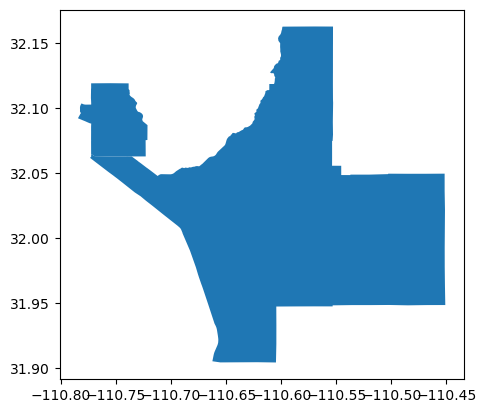

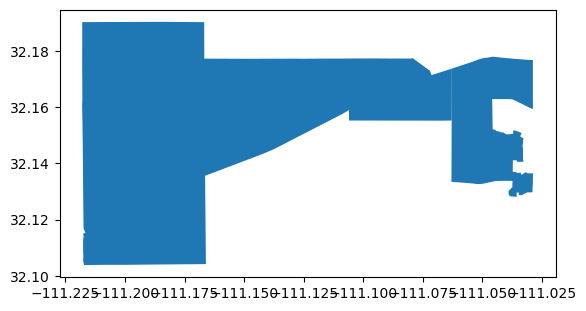

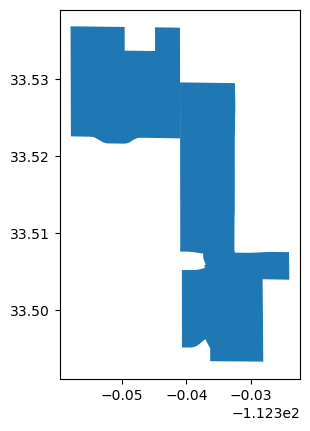

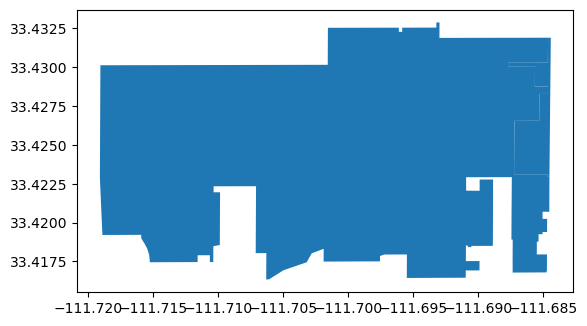

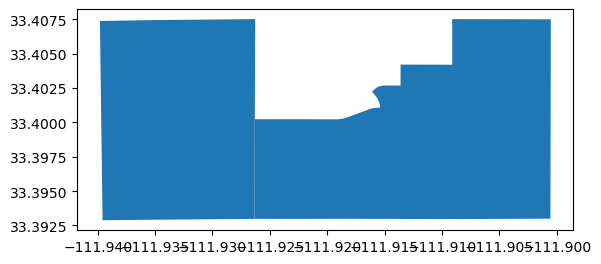

In [15]:
indexs = [1268, 1466]
display(state.iloc[indexs].plot())
indexs = [1411, 1468]
display(state.iloc[indexs].plot())
indexs = [1014, 1034]
display(state.iloc[indexs].plot())
indexs = [735, 860]
display(state.iloc[indexs].plot())
indexs = [538, 539]
display(state.iloc[indexs].plot())

Exporting Adjacency Graph Edges

In [16]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Arizona/arizonaEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(266, 268),
 (562, 1084),
 (1097, 1099),
 (242, 1488),
 (536, 537),
 (201, 404),
 (514, 635),
 (948, 976),
 (860, 863),
 (669, 1066),
 (137, 239),
 (1358, 1368),
 (242, 441),
 (461, 479),
 (620, 881),
 (915, 1064),
 (1095, 1174),
 (1307, 1439),
 (940, 1008),
 (1253, 1468),
 (1326, 1452),
 (1373, 1384),
 (1140, 1182),
 (484, 877),
 (1375, 1457),
 (872, 873),
 (332, 334),
 (1124, 1174),
 (609, 728),
 (662, 883),
 (22, 28),
 (674, 708),
 (1288, 1425),
 (1289, 1390),
 (512, 795),
 (1113, 1164),
 (112, 187),
 (905, 906),
 (937, 938),
 (263, 356),
 (336, 340),
 (120, 307),
 (55, 61),
 (761, 861),
 (7, 21),
 (558, 798),
 (618, 1078),
 (678, 1092),
 (1114, 1165),
 (59, 68),
 (387, 391),
 (366, 368),
 (733, 799),
 (1125, 1174),
 (150, 335),
 (390, 396),
 (696, 768),
 (1137, 1148),
 (1317, 1344),
 (1229, 1231),
 (548, 753),
 (1363, 1460),
 (147, 180),
 (747, 819),
 (485, 670),
 (380, 388),
 (391, 397),
 (431, 433),
 (1295, 1298),
 (578, 897),
 (173, 174),
 (985, 992),
 (791, 861),
 (384, 394),


tuple

int